In [2]:
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"]="2"

Для сохрнения предыдущих результатов

In [9]:
!mkdir outputs/exp_6_04_2
!mv outputs/exp_/* outputs/exp_6_04_2/
#!rm -r outputs

In [3]:
!../env1/bin/python3 train.py

[2021-04-06 21:06:49,873][__main__][INFO] - For logs, checkpoints and samples check /zfs/store5.hydra.local/user/r/rybakina/sirius/denoiser_project/denoiser/outputs/exp_
[2021-04-06 21:06:58,411][denoiser.solver][INFO] - ----------------------------------------------------------------------
[2021-04-06 21:06:58,411][denoiser.solver][INFO] - Training...
[2021-04-06 21:08:14,026][denoiser.solver][INFO] - Train | Epoch 1 | 165/497 | 2.2 it/sec | Loss 0.03562
[2021-04-06 21:09:28,812][denoiser.solver][INFO] - Train | Epoch 1 | 330/497 | 2.2 it/sec | Loss 0.02903
[2021-04-06 21:10:43,529][denoiser.solver][INFO] - Train | Epoch 1 | 495/497 | 2.2 it/sec | Loss 0.02597
[2021-04-06 21:10:44,378][denoiser.solver][INFO] - Train Summary | End of Epoch 1 | Time 225.97s | Train Loss 0.02594
[2021-04-06 21:10:44,378][denoiser.solver][INFO] - ----------------------------------------------------------------------
[2021-04-06 21:10:44,379][denoiser.solver][INFO] - Cross validation...
[2021-04-06 21:11:2

Построим график обучения модели:

In [4]:
import pandas as pd
import json
with open("outputs/exp_/history.json", "r") as read_file:
    data = json.load(read_file)
df = pd.DataFrame.from_dict(data, orient='columns')

In [5]:
import matplotlib.pyplot as plt
tr = df['train']
val = df['valid']
bst=df['best']

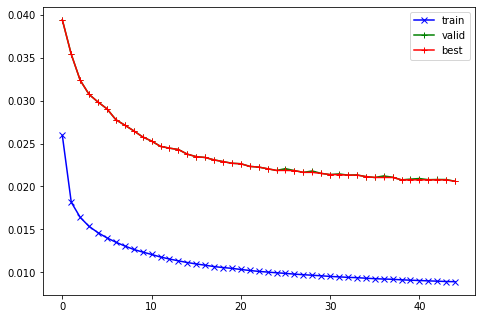

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
times = np.arange(len(tr))
ax = fig.add_axes([0,0,1,1])

ax.plot(times, tr, 'bx', label="train",linestyle='solid')
ax.plot(times, val, 'g+', label="valid",linestyle='solid')
ax.plot(times, bst, 'r+', label="best",linestyle='solid')

ax.legend();

Для запуска теста:

In [1]:
!rm -r outputs_test/*

In [3]:
!../env1/bin/python -m denoiser.enhance --model_path=./outputs/exp_/best.th --noisy_dir=test/test --out_dir=outputs_test

INFO:denoiser.pretrained:Loading model from ./outputs/exp_/best.th
INFO:__main__:Generate enhanced files | 441/2206 | 416.2 it/sec
INFO:__main__:Generate enhanced files | 882/2206 | 557.6 it/sec
INFO:__main__:Generate enhanced files | 1323/2206 | 600.3 it/sec
INFO:__main__:Generate enhanced files | 1764/2206 | 648.9 it/sec
INFO:__main__:Generate enhanced files | 2205/2206 | 666.3 it/sec
Waiting for pending jobs...
INFO:__main__:Generate enhanced files | 441/2206 | 29.9 it/sec
INFO:__main__:Generate enhanced files | 882/2206 | 28.1 it/sec
INFO:__main__:Generate enhanced files | 1323/2206 | 27.4 it/sec
INFO:__main__:Generate enhanced files | 1764/2206 | 27.2 it/sec
INFO:__main__:Generate enhanced files | 2205/2206 | 27.1 it/sec


In [8]:
!../env/bin/pip install crc32c

     |████████████████████████████████| 51kB 831kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
!../env1/bin/pip install -U hydra

  Using cached https://files.pythonhosted.org/packages/6e/ac/7a7596cb752fe807be2f6fa11ed561e39efa86f556214733fc7df0e985d9/Hydra-2.5.tar.gz
  Running setup.py install for hydra ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
!../env1/bin/pip install --ignore-installed --user scipy                                                                                                        

  Using cached https://files.pythonhosted.org/packages/2c/30/518c0011f681125528b2e64ad9f5455d4f34e012b9e3a56a6d4ff5486769/scipy-1.6.1-cp38-cp38-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c7/e6/dccac76b7e825915ffb906beeba5a953597b6cfe1fe686b5276e122cb07c/numpy-1.20.1-cp38-cp38-manylinux2010_x86_64.whl
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
!../env1/bin/pip install torch==1.5.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu101/torch-1.5.1%2Bcu101-cp38-cp38-linux_x86_64.whl
  Found existing installation: torch 1.5.1
    Uninstalling torch-1.5.1:
      Successfully uninstalled torch-1.5.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
!../env/bin/pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.
